In [13]:
%pip install klib shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/ee/60/db3416646efc5d6e2c27f75b30bdda9c77d54dad44a5fbb1fe888a2a958b/shap-0.42.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/e8/1c/5d65ac922a4f9a6f90a10207b818e22e4d48a782af6574a6e7a50fae074d/numba-0.58.0-cp311-cp311-win_amd64.whl.metadata
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/14/3b/f9665a46486f70a7cbb6237308e49e18ed42e4763f4e92e92cd37ea67ead/llvmlite-0.41.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information

# Importando as bibliotecas necessárias

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import klib
import seaborn as sns
from scipy.stats import linregress
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import shap
import xgboost as xgb
from sklearn.preprocessing import RobustScaler

# Carregando os arquivos em CSV

In [18]:
c = pd.read_csv('base_dados/base_clientes.csv')
hc = pd.read_csv('base_dados/base_hist_churn.csv')
p = pd.read_csv('base_dados/base_precos.csv')
pd.set_option('display.max_columns', None)

# Exploração de dados

## Puxando as informações da tabela de clientes

In [8]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

## Substituindo os tipos da tabela de clientes "objects" por "categóricos" e "float64", "int64" por "numéricos"

|    | Column                  | Non-Null Count | Dtype       |
|---:|:------------------------|:--------------:|:------------|
|  0 | id                      | 20120          | categórico  |
|  1 | activity_new            | 8221           | categórico  |
|  2 | campaign_disc_ele       | 0              | numérico    |
|  3 | channel_sales           | 14846          | categórico  |
|  4 | cons_12m                | 20120          | numérico    |
|  5 | cons_gas_12m            | 20120          | numérico    |
|  6 | cons_last_month         | 20120          | numérico    |
|  7 | date_activ              | 20120          | categórico  |
|  8 | date_end                | 20118          | categórico  |
|  9 | date_first_activ        | 4385           | categórico  |
| 10 | date_modif_prod         | 19918          | categórico  |
| 11 | date_renewal            | 20076          | categórico  |
| 12 | forecast_base_bill_ele  | 4385           | numérico    |
| 13 | forecast_base_bill_year | 4385           | numérico    |
| 14 | forecast_bill_12m       | 4385           | numérico    |
| 15 | forecast_cons           | 4385           | numérico    |
| 16 | forecast_cons_12m       | 20120          | numérico    |
| 17 | forecast_cons_year      | 20120          | numérico    |
| 18 | forecast_discount_energy| 19970          | numérico    |
| 19 | forecast_meter_rent_12m | 20120          | numérico    |
| 20 | forecast_price_energy_p1| 19970          | numérico    |
| 21 | forecast_price_energy_p2| 19970          | numérico    |
| 22 | forecast_price_pow_p1   | 19970          | numérico    |
| 23 | has_gas                 | 20120          | categórico  |
| 24 | imp_cons                | 20120          | numérico    |
| 25 | margin_gross_pow_ele    | 20105          | numérico    |
| 26 | margin_net_pow_ele      | 20105          | numérico    |
| 27 | nb_prod_act             | 20120          | numérico    |
| 28 | net_margin              | 20102          | numérico    |
| 29 | num_years_antig         | 20120          | numérico    |
| 30 | origin_up               | 20006          | categórico  |
| 31 | pow_max                 | 20116          | numérico    |

## Puxando as informações da tabela de churn

In [9]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


## Substituindo os tipos da tabela de churn objects por "categóricos" e "float64", "int64" por "numéricos"

|    | Column | Non-Null Count | Dtype   |
|---:|:-------|:--------------:|:-------:|
|  0 | id     | 16096          | categórico  |
|  1 | churn  | 16096          | numérico   |

## Puxando as informações da tabela de Preços

In [10]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


## Substituindo os tipos da tabela de preços objects por "categóricos" e "float64", "int64" por "numéricos"

|    | Column      | Non-Null Count | Dtype    |
|---:|:------------|:--------------:|:--------:|
|  0 | id          | 241238         | categórico   |
|  1 | price_date  | 241238         | categórico   |
|  2 | price_p1_var| 239577         | numérico  |
|  3 | price_p2_var| 239577         | numérico  |
|  4 | price_p3_var| 239577         | numérico  |
|  5 | price_p1_fix| 239577         | numérico  |
|  6 | price_p2_fix| 239577         | numérico  |
|  7 | price_p3_fix| 239577         | numérico  |

## Estatística descritiva das colunas da tabela de clientes

In [11]:
c.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,19970.000000,20120.000000,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,1.007611,70.064085,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,5.217714,78.219057,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,0.000000,19.430000,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,0.000000,131.490000,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


As estatísticas da tabela de clientes forneceram informações sobre a distribuição dos dados e auxiliam a entender a tendência central, a dispersão e os valores extremos em cada variável. Com base nessas estatísticas, retiram-se várias conclusões sobre seus dados, como a presença de outliers, a faixa de valores típicos, relação entre diferentes variáveis, também serve de orientação para definir ações estratégicas e relevar insights importantes. Ademais foi observado que os valores negativados (na linha 'min') são erros de input que serão analisados e tratados futuramente pela equipe.

## Estatística descritiva das colunas da tabela de churn

In [12]:
hc.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Essa análise sugere que a maioria das amostras tem um valor de churn igual a 0 (sem cancelamento), já que tanto o primeiro quanto o terceiro quartil (conceito estatístico utilizado para dividir um conjunto de dados ordenados em quatro partes iguais) são 0. No entanto, a média de 0.099 sugere que cerca de 9.9% das amostras têm um valor de churn igual a 1 (houve cancelamento).

## Estatística descritiva das colunas da tabela de Preços

In [13]:
p.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Essas estatísticas fornecem uma visão geral sobre a distribuição e os intervalos de valores para cada variável. Esses valores são úteis para entender a variação e a tendência central dos preços associados a diferentes componentes, também, para identificar possíveis valores extremos ou anomalias nos dados.

## Tabela de clientes com valores faltando

GridSpec(6, 6)

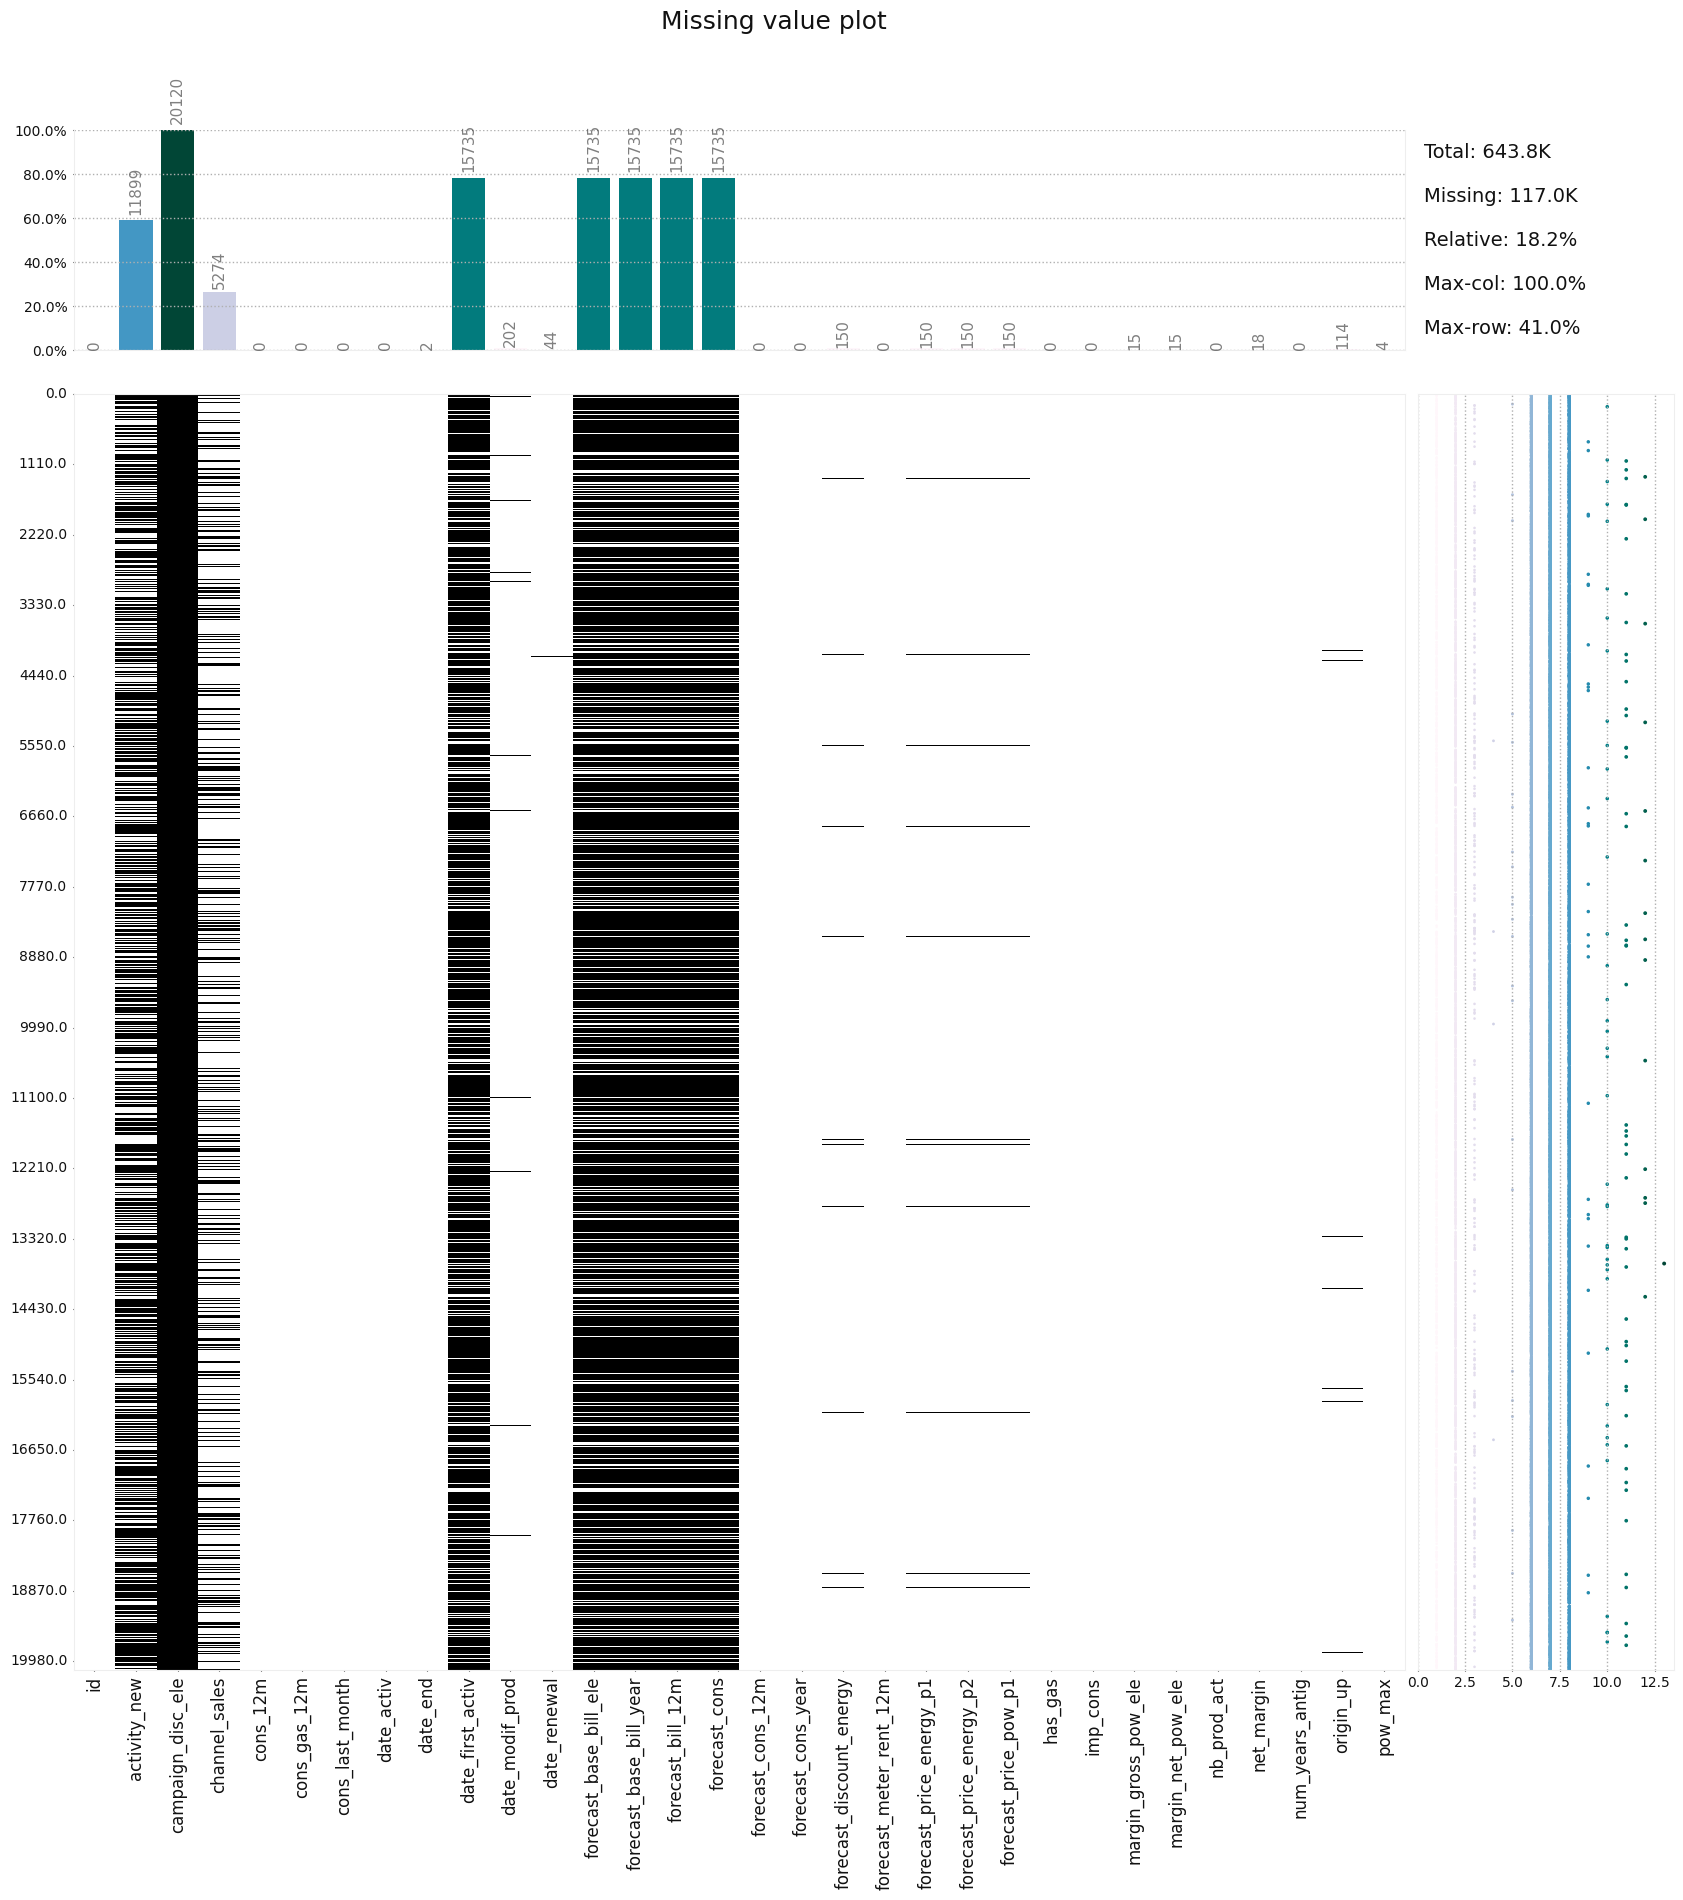

In [14]:
klib.missingval_plot(c)

## Tabela de churn com valores faltando

In [15]:
klib.missingval_plot(hc)

No missing values found in the dataset.


## Tabela de preços com valores faltando

GridSpec(6, 6)

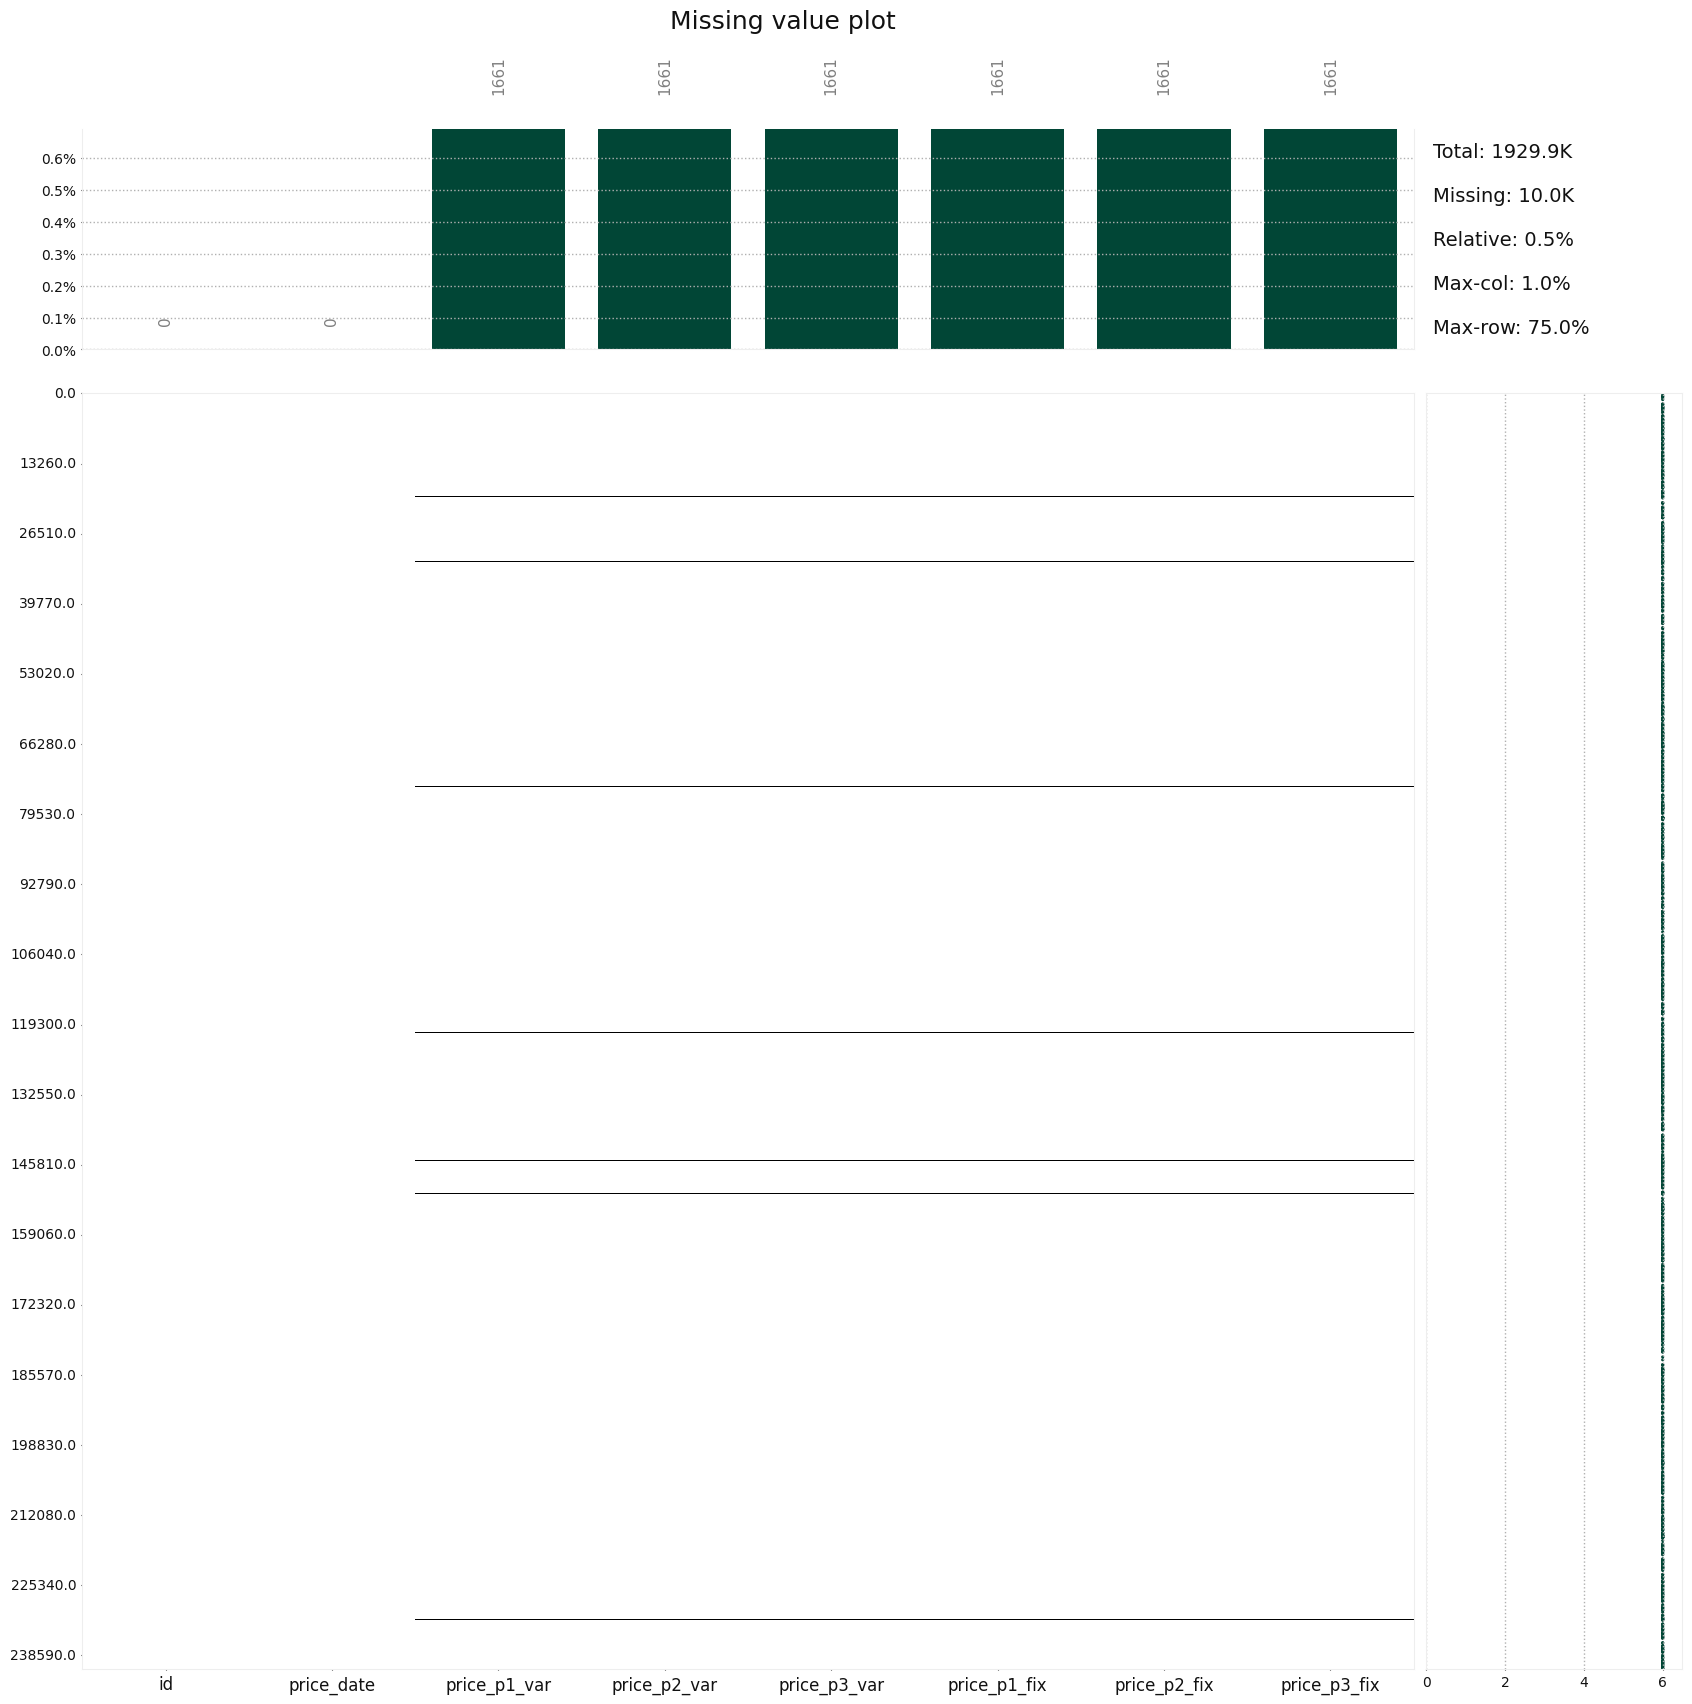

In [16]:
klib.missingval_plot(p)

## Matriz de relação entre as colunas

Entender a relação entre as colunas é fundamental para decifrar como as variáveis interagem. Essa compreensão desempenha um papel vital na identificação das colunas mais pertinentes à previsão. Isso também facilita a distinção de colunas que não são relevantes. Embora nem todas sejam essenciais, algumas podem ser dispensadas quando se trata da previsão do churn. Ao reconhecer as relações, conseguimos rapidamente determinar quais colunas podem ser descartadas. Além disso, ao identificar quais têm uma forte ligação com a variável alvo, ganhamos insights valiosos sobre onde direcionar nossos esforços de otimização.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

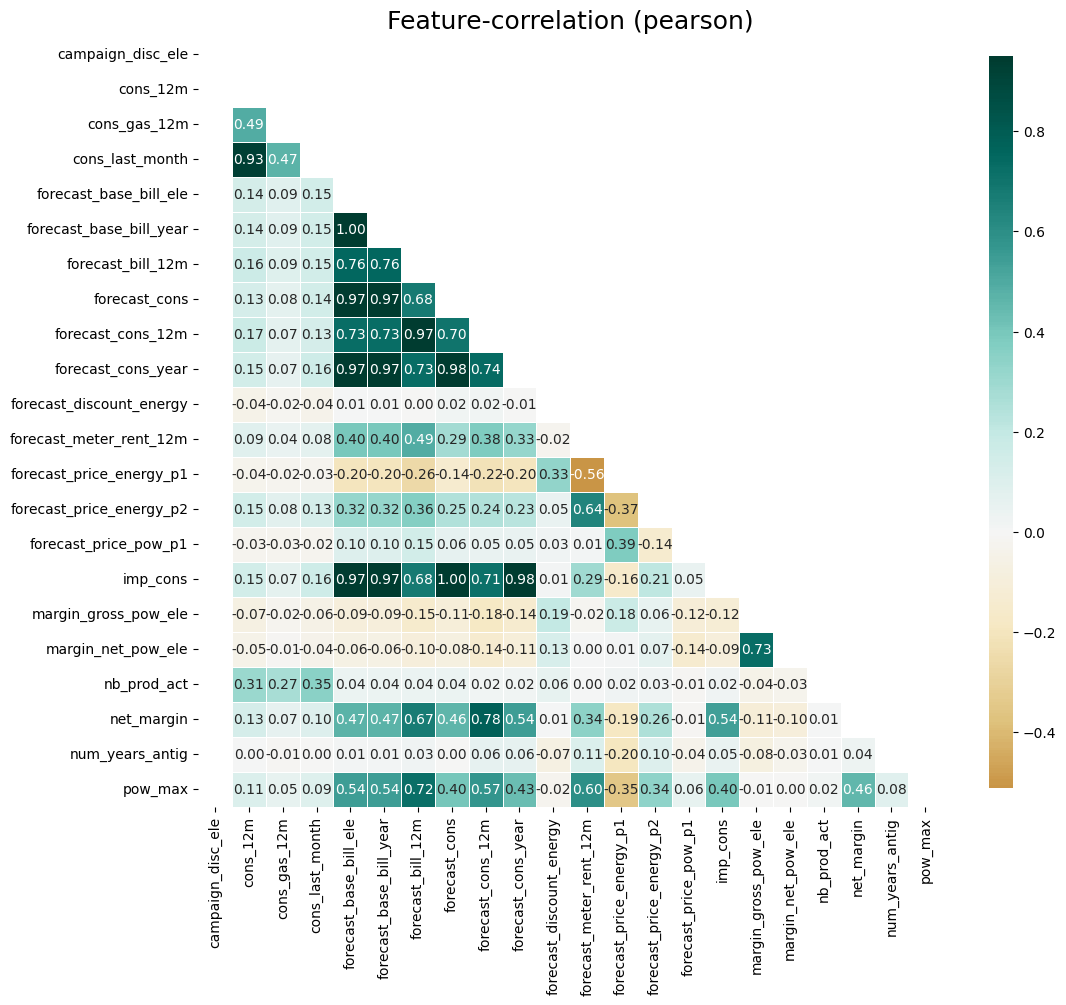

In [17]:
#Gera um gráfico da matriz de correlação entre as colunas.
klib.corr_plot(c)

## Gráfico de relação entre forecast_cons e imp_cons

A relação entre o preço atual do consumo de energia (imp_cons) e a previsão de consumo elétrico para o próximo mês (forecast_cons) é forte e relevante porque os valores são muito parecidos. Conclui-se então que ao interpretar essa tabela que uma coluna pode se tornar irrelevante ao entender que os valores são iguais e que há existência de outliers.

Text(0, 0.5, 'imp_cons')

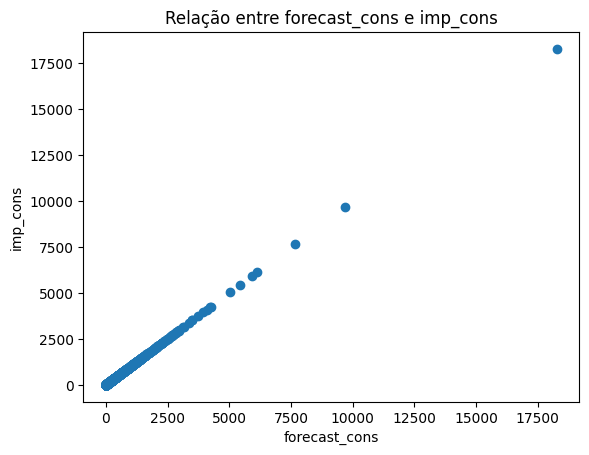

In [18]:
#Relação entre as colunas forecast_cons e imp_cons
plt.scatter(c['forecast_cons'], c['imp_cons'])
# Adicionando título e legendas
plt.title("Relação entre forecast_cons e imp_cons")
plt.xlXel("forecast_cons")
plt.ylXel("imp_cons")

## Gráfico de relação entre forecast_bill_12m e imp_cons

A relação entre o preço atual do consumo de energia (imp_cons) e a previsão da fatura de consumo elétrico para os próximos 12 meses (forecast_bill_12m) é relevante porque os valores se concentram numa parte, podem ser descritos numa regressão linear e com presença de outliers.

Text(0, 0.5, 'imp_cons')

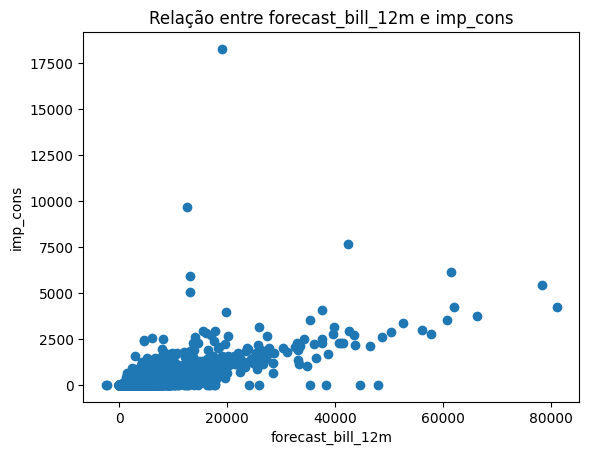

In [19]:
#Relação entre as colunas forecast_bill_12m e imp_cons
plt.scatter(c['forecast_bill_12m'], c['imp_cons'])
# Adicionando título e legendas
plt.title("Relação entre forecast_bill_12m e imp_cons")
plt.xlXel("forecast_bill_12m")
plt.ylXel("imp_cons")

## Gráfico de relação entre forecast_base_bill_year e forecast_base_bill_ele


A relação entre o valor base da fatura de eletricidade prevista para o próximo mês (forecast_base_bill_ele) e o valor base da fatura de eletricidade prevista para o ano (forecast_base_bill_year) é forte e relevante porque os valores são muito parecidos e no final poderemos escolher um deles porque se escolhermos os dois poderemos enviesar o modelo.

Text(0, 0.5, 'forecast_base_bill_year')

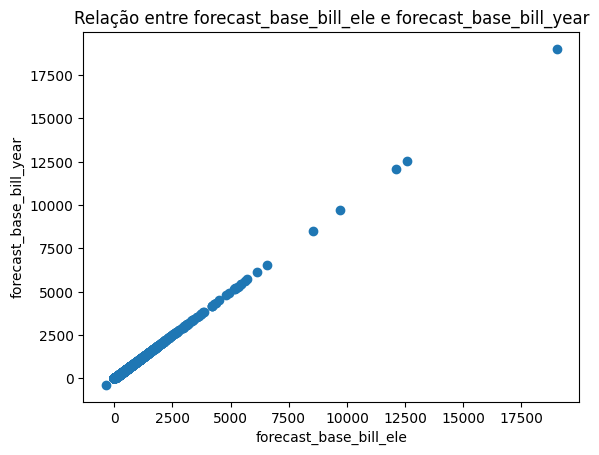

In [20]:
#Relação entre as colunas forecast_price_energy_p1 e forecast_meter_rent_12m
plt.scatter(c['forecast_base_bill_ele'], c['forecast_base_bill_year'])
# Adicionando título e legendas
plt.title("Relação entre forecast_base_bill_ele e forecast_base_bill_year")
plt.xlXel("forecast_base_bill_ele")
plt.ylXel("forecast_base_bill_year")

# 1 Limpeza dos dados e engenharia de features

### 1.1 Engenharia de Features na tabela de preços

<b>Processamento e Extração de Características</b>

Calculamos a soma dos valores para cada período (var e fix)

In [19]:
# Calculating the sum of values for each period (var and fix)
p['total_var'] = p[['price_p1_var', 'price_p2_var', 'price_p3_var']].sum(axis=1)
p['total_fix'] = p[['price_p1_fix', 'price_p2_fix', 'price_p3_fix']].sum(axis=1)

Criamos indicadores booleanos para o consumo de energia em cada período (var e fix)

In [20]:
# Creating boolean indicators for energy consumption in each period (var and fix)
for period in ['p1', 'p2', 'p3']:
    p[f'{period}_var'] = (p[f'price_{period}_var'] > 0).astype(int)
    p[f'{period}_fix'] = (p[f'price_{period}_fix'] > 0).astype(int)

Agrupamos por 'id' e pegamos a mediana das novas características

In [21]:
# Grouping by 'id' and taking the median of the new features
reshaped_data = p.groupby('id').agg({
    'total_var': 'median',
    'total_fix': 'median',

    'p1_var': 'median',
    'p2_var': 'median',
    'p3_var': 'median',
    'p1_fix': 'median',
    'p2_fix': 'median',
    'p3_fix': 'median'
}).reset_index()

In [22]:
# Checking the first few rows of the reshaped data
p = reshaped_data

Substituímos valores infinitos pelo valor NaN

### 1.2 Preenchendo os valores vazios da tabela forecast_base_bill_ele

<b>Imputação com Regressão Linear</b>

Nesta seção, estamos usando a regressão linear para prever e imputar valores faltantes nas colunas forecast_base_bill_ele e forecast_base_bill_year.

Selecionamos as colunas relevantes (forecast_base_bill_ele e imp_cons) e removemos os registros com valores faltantes

In [23]:
regression_data = c[['forecast_base_bill_ele', 'imp_cons']].dropna()

Definimos as variáveis independentes (X) e dependentes (y) para o modelo

In [24]:
X = regression_data[['imp_cons']]
y = regression_data['forecast_base_bill_ele']

Treinamos um modelo de regressão linear com os dados

In [25]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Após treinar o modelo, obtemos a inclinação (coeficiente) e o intercepto do modelo

In [26]:
slope = model.coef_[0]
intercept = model.intercept_

Usamos o modelo treinado para prever e imputar os valores faltantes em ambas as colunas

In [27]:
c['forecast_base_bill_ele'].fillna(c['imp_cons'] * slope + intercept, inplace=True)
c['forecast_base_bill_year'].fillna(c['imp_cons'] * slope + intercept, inplace=True)


Verificamos quantos valores faltantes ainda estão presentes nas colunas após a imputação

In [28]:
missing_values_after_imputation = c[['forecast_base_bill_ele', 'forecast_base_bill_year']].isnull().sum()
missing_values_after_imputation

forecast_base_bill_ele     0
forecast_base_bill_year    0
dtype: int64

Esta Xordagem nos permite lidar com valores faltantes, usando a relação linear entre as colunas forecast_base_bill_ele e imp_cons para imputar valores faltantes de maneira informada.

### 1.3 Merge na tabela de preços e clientes para limpeza e transformação dos dados

<b>Limpeza de dados</b>

O grupo identificou que as colunas de "campaign_disc_ele" e "date_firts_activ" estão com muitos dados faltantes, portanto estamos deletando essas colunas para que elas não atrapalhem o modelo.

In [29]:
pc = c.merge(p, how='inner', on='id')

pc = pc.drop(['campaign_disc_ele','date_first_activ'], axis=1)

<b>Fazendo ajustes na coluna de has_gas.</b>

O modelo não entende "t" e "f", por conta disso, estamos mudando para True e False. Depois disso é necessário mudar o tipo do dado da coluna para int (inteiro), para que o modelo entenda que a informação é binária.

In [30]:
pc['has_gas'] = pc['has_gas'].map({'t': True, 'f': False})
pc['has_gas'] = pc['has_gas'].astype(int)

<b>Limpeza primeira camada</b>

O código Xaixo faz uma limpeza no dataframe. Não houve nenhuma linha ou coluna excluída, mas podemos ver que reduziu espaço de memória. Fizemos isso para conseguirmos trXalhar melhor com o dataframe.

In [31]:
pc_cleaned = klib.data_cleaning(pc)

Shape of cleaned data: (20120, 38) - Remaining NAs: 49657


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.6 MB (-45.14%)



<b>Tratamento de missing values</b>

Na primeira parte, está sendo inserido o valor "unknown" nos campos com valores nulos da coluna de channe_sales. A mesma ação está sendo tomada com a coluna origin_up. Na última parte, estamos substituindo os campos nulos na coluna de activity_new por 0 e os campos com valores para 1.

A razão para substituir valores nulos por "unknow" é que consideramos a falta de dados nas colunas como correta, ou seja, não temos dados do canal de vendas porque não houve um canal.

Já no caso da substituição de valores na coluna de activity_new está relacionada a uma correlação observada, onde sempre que há dados os valores são altos e quando não há são baixos. A hipótese adotada é a de que a presença de dados significa que o cliente é uma empresa, e quando não há seria uma residência ou algo do tipo.

In [32]:
# Changing the nan values to unknown
pc_cleaned['channel_sales'] = pc_cleaned['channel_sales'].replace(np.nan, 'unknown')
pc_encoded = pd.get_dummies(pc_cleaned, columns=['channel_sales'])

# Changing the nan values to unknown
pc_encoded['origin_up'] = pc_encoded['origin_up'].replace(np.nan, 'unknown')
pc_encoded = pd.get_dummies(pc_encoded, columns=['origin_up'])

<b>Eliminação de colunas</b>

Foi identificado pouca relevância das colunas de "forecast_base_bil_year", "forecast_bill_12m", "forecast_cons" porque existem muitos poucos dados e a sua correlação com outras colunas é tão alta que poderia ser considerado valores duplicados e que podem inviesar o modelo. Por isso as colunas foram excluídas.

In [33]:
# droping columns with missing values
pc = pc_encoded.drop(['forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'activity_new'], axis=1)
pc = pc.dropna()
pc

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,total_var,total_fix,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_aabpopmuoobccoxasfsksebxoxffdcxs,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,ed18c9981ce183ef347246cdcc55f743,42132,0,3215,06/09/2017,06/09/2022,27/08/2021,07/09/2021,451.048858,4001.08,3215,0.0,130.429993,0.114603,0.098261,40.606701,0,296.899994,9.630000,9.630000,1,488.250000,4,20.000000,0.304202,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False
1,9c341e73685fcff6e3527ebd51da3fe5,3537,0,563,13/12/2016,31/12/2022,13/12/2016,01/01/2022,172.527461,518.22,563,0.0,23.200001,0.142174,0.000000,44.444710,0,80.660004,0.120000,0.120000,1,29.180000,5,15.000000,0.148082,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False
2,97dd64b33716aadc4e22c4ab85d1c7a4,6543,0,399,04/09/2016,04/09/2022,27/08/2021,05/09/2021,117.464615,639.65,399,0.0,130.320007,0.115182,0.098841,40.606701,0,37.910000,15.530000,15.530000,1,74.589996,5,17.320999,0.311311,81.131935,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False
3,cf81de72ff7997ed10729751059cf7a3,186838,0,12091,03/01/2017,03/01/2023,03/01/2017,04/01/2022,188.576187,2634.23,738,0.0,16.420000,0.164058,0.086163,44.311378,0,93.120003,27.000000,27.000000,1,210.179993,5,11.951000,0.255831,44.266930,1.0,1.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False
4,c7c8ee9daf2a864d159d45a2373ada72,19051,0,0,07/10/2017,07/10/2022,27/08/2021,09/10/2021,68.635785,2801.47,0,0.0,0.000000,0.141434,0.000000,44.311378,0,0.000000,8.620000,8.620000,1,223.229996,4,13.150000,0.149315,44.266930,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,32270,47940,0,24/05/2018,08/05/2022,08/05/2021,26/05/2020,68.635785,4648.01,0,0.0,18.570000,0.138305,0.000000,44.311378,1,0.000000,27.879999,27.879999,2,381.769989,4,15.000000,0.144350,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False
20116,d0a6f71671571ed83b2645d23af6de00,7223,0,181,27/08/2018,27/08/2022,27/08/2018,28/08/2021,68.640000,631.69,181,0.0,144.029999,0.100167,0.091892,58.995953,0,15.940000,0.000000,0.000000,1,90.339996,3,6.000000,0.277385,103.615761,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False
20117,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,08/02/2018,07/02/2022,08/02/2018,09/02/2021,91.884542,190.39,179,0.0,129.600006,0.116900,0.100015,40.606701,0,18.049999,39.840000,39.840000,1,20.379999,4,15.935000,0.300305,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False
20118,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,30/08/2018,30/08/2022,30/08/2018,31/08/2021,68.635785,19.34,0,0.0,7.180000,0.145711,0.000000,44.3

<b>Valores inválidos</b>


Existem datas inválidas no banco de dados. Ex: 29/02/2018, OBS: 2018 não é ano bissexto. O código itera sobre as features especificadas e quando encontra uma data inválida a substitui por outra data correspondente. Depois cria-se uma coluna de ano ao invés da data completa, foi entendido que dia a mês não são tão relevantes e que essa informação seria melhor aproveitada dessa maneira.

In [34]:
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'] # Date columns
invalid_dates = {"29/02/2018": "28/02/2018", "29/02/2022": "28/02/2022"} # Invalid dates

# Replace invalid dates with the most likely correct date
for col in date_cols:
    for inv_date, rep_date in invalid_dates.items():
        pc[col] = pc[col].replace(inv_date, rep_date)

for col in date_cols:
    pc[col + '_year'] = pd.to_datetime(pc[col], dayfirst=True).dt.year

# Droping the original date columns
pc = pc.drop(columns=date_cols)
pc

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,total_var,total_fix,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_aabpopmuoobccoxasfsksebxoxffdcxs,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
0,ed18c9981ce183ef347246cdcc55f743,42132,0,3215,451.048858,4001.08,3215,0.0,130.429993,0.114603,0.098261,40.606701,0,296.899994,9.630000,9.630000,1,488.250000,4,20.000000,0.304202,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2017,2022,2021,2021
1,9c341e73685fcff6e3527ebd51da3fe5,3537,0,563,172.527461,518.22,563,0.0,23.200001,0.142174,0.000000,44.444710,0,80.660004,0.120000,0.120000,1,29.180000,5,15.000000,0.148082,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2016,2022,2016,2022
2,97dd64b33716aadc4e22c4ab85d1c7a4,6543,0,399,117.464615,639.65,399,0.0,130.320007,0.115182,0.098841,40.606701,0,37.910000,15.530000,15.530000,1,74.589996,5,17.320999,0.311311,81.131935,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2016,2022,2021,2021
3,cf81de72ff7997ed10729751059cf7a3,186838,0,12091,188.576187,2634.23,738,0.0,16.420000,0.164058,0.086163,44.311378,0,93.120003,27.000000,27.000000,1,210.179993,5,11.951000,0.255831,44.266930,1.0,1.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2017,2023,2017,2022
4,c7c8ee9daf2a864d159d45a2373ada72,19051,0,0,68.635785,2801.47,0,0.0,0.000000,0.141434,0.000000,44.311378,0,0.000000,8.620000,8.620000,1,223.229996,4,13.150000,0.149315,44.266930,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,False,True,False,2017,2022,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,32270,47940,0,68.635785,4648.01,0,0.0,18.570000,0.138305,0.000000,44.311378,1,0.000000,27.879999,27.879999,2,381.769989,4,15.000000,0.144350,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2018,2022,2021,2020
20116,d0a6f71671571ed83b2645d23af6de00,7223,0,181,68.640000,631.69,181,0.0,144.029999,0.100167,0.091892,58.995953,0,15.940000,0.000000,0.000000,1,90.339996,3,6.000000,0.277385,103.615761,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2018,2022,2018,2021
20117,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,91.884542,190.39,179,0.0,129.600006,0.116900,0.100015,40.606701,0,18.049999,39.840000,39.840000,1,20.379999,4,15.935000,0.300305,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2018,2022,2018,2021
20118,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,68.635785,19.34,0,0.0,7.180000,0.145711,0.000000,44.311378,0,0.000000,13.080000,13.080000,1,0.960000,3,11.000000,0.151367,44.266930,1.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,2018,2022,2018,2021


<b>Remoção de valores negativos</b>

Verificamos que existem valores negativos em algumas colunas, então excluimos esses valores negativos porque entendemos que eles não podem ser usados pois podem inviesar o modelo.

In [35]:
# Removing negative values from the dataset
columns_to_remove_negatives = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
    'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_pow_p1',
    'imp_cons', 'net_margin', 'margin_net_pow_ele', 'margin_gross_pow_ele'
]

mask = (pc[columns_to_remove_negatives] >= 0).all(axis=1)
pc = pc[mask]

# 2 Modelagem e Validação

### 2.1 Dividindo os dados para treinamento, validação cruzada e teste

<b>Unindo, dividindo e verificando os dados para modelagem</b>

O grupo percebeu a necessidade de combinar diferentes conjuntos de dados, isolando as características (features) e os alvos (target), e dividindo os dados em conjuntos de treinamento e teste. Este processo é fundamental para a posterior construção e avaliação do modelo.

Os dados são então divididos em conjuntos de treinamento e teste, usando 80% dos dados para treinamento e os 20% restantes para teste. Isso permite que o modelo seja treinado e avaliado em dados separados, garantindo uma avaliação justa de sua performance.

Para garantir que a divisão foi feita corretamente e que ambos os conjuntos (treinamento e teste) têm uma distribuição similar da variável alvo, imprimimos a contagem de valores.

In [36]:
# Merge the data
train_val_data = pd.merge(pc, hc, on='id', how='inner')

# Split the data into features and target
X = train_val_data.drop(columns=['id', 'churn'])
y = train_val_data['churn']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the scaler
scaler = RobustScaler()

# Fit on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform on test data

In [24]:
# PCA
from sklearn.decomposition import PCA

# Let's reduce the data to 20 components using PCA
pca = PCA(n_components=20)

# Fit on the training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Use transform, not fit_transform on test data

componentes_df = pd.DataFrame(pca.components_, columns=X_train.columns)
componentes_df

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,total_var,total_fix,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_aabpopmuoobccoxasfsksebxoxffdcxs,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
0,0.000049,1.000000e+00,0.000060,8.713848e-07,6.777757e-07,9.705335e-07,-5.264497e-07,1.422035e-07,-1.064630e-07,2.268761e-07,-1.582472e-07,8.777488e-07,8.986363e-07,-3.090446e-08,-3.108153e-08,0.000001,7.331665e-07,-7.796750e-08,4.809430e-07,2.068604e-07,1.444698e-07,1.486521e-09,2.460826e-07,1.405367e-07,7.622370e-09,1.415928e-07,1.415928e-07,-2.823707e-10,-3.558581e-08,0.0,-8.677732e-08,2.023922e-07,-7.529884e-10,-7.045006e-08,0.0,-9.412355e-11,1.223485e-07,-5.469298e-08,-6.444540e-08,-1.882471e-10,1.006003e-07,4.616848e-08,-1.435922e-07,4.579601e-08
1,-0.652311,7.760485e-05,-0.757255,-1.390411e-02,-1.064672e-02,-1.553579e-02,1.013641e-02,-1.399540e-03,-1.945414e-04,-2.965268e-03,9.524672e-04,-6.635114e-04,-1.427381e-02,1.131075e-03,1.128231e-03,-0.001937,-8.958625e-03,-5.188724e-04,-6.093393e-03,-2.374777e-03,-8.637169e-04,-1.191209e-05,-3.364046e-03,-7.958341e-04,-5.995930e-05,-8.057284e-04,-8.057284e-04,2.088918e-06,5.260013e-04,0.0,2.594773e-03,-5.023381e-03,6.404820e-06,9.276563e-04,0.0,8.520263e-07,-1.660079e-03,2.885395e-04,1.350765e-03,-5.959908e-08,-1.441153e-04,1.208674e-04,2.734289e-03,-7.095626e-05
2,-0.002148,-2.781081e-07,0.013172,2.485497e-02,2.285812e-02,1.677833e-02,9.907976e-01,1.065398e-03,5.740682e-02,7.988351e-03,1.246114e-02,8.941606e-04,2.565039e-02,6.969074e-02,6.946391e-02,0.015427,3.827687e-02,-1.133379e-02,1.106247e-02,1.366464e-02,2.058920e-03,8.309045e-05,2.132326e-03,7.574234e-04,4.060692e-04,7.261192e-04,7.261192e-04,-9.773499e-06,-4.971704e-04,-0.0,5.314078e-03,-2.323385e-03,-2.684071e-05,1.088328e-03,-0.0,-3.994007e-06,-5.246782e-03,-2.131479e-03,7.163982e-03,-6.974063e-06,1.342154e-02,-1.462055e-04,1.763642e-02,-1.013515e-02
3,-0.226510,-1.415799e-07,0.157276,4.500740e-01,2.576069e-01,4.851819e-01,-5.654164e-02,7.301644e-02,-6.763306e-02,4.866994e-02,-2.755710e-02,5.182827e-03,4.493445e-01,3.459989e-02,3.462944e-02,0.005950,2.951761e-01,9.829517e-03,3.068433e-01,4.885284e-02,5.978942e-02,7.509322e-05,4.727192e-02,5.506119e-02,3.710459e-04,5.515315e-02,5.515315e-02,1.523601e-05,-7.592549e-04,0.0,6.063058e-03,-1.106035e-03,-4.990606e-05,-4.370636e-03,0.0,-1.254891e-05,-1.229711e-02,5.398591e-03,6.257435e-03,1.121768e-06,-6.524239e-03,2.128855e-03,-2.035423e-03,3.106471e-03
4,0.713186,1.567510e-06,-0.624530,7.785587e-02,1.267306e-01,8.273922e-02,-8.933277e-03,4.237362e-02,-3.502510e-02,2.955804e-02,-2.555074e-02,6.372785e-03,7.259546e-02,3.256306e-02,3.256559e-02,-0.010151,1.511416e-01,4.999994e-03,1.778198e-01,2.897409e-02,3.209733e-02,4.406518e-05,2.876371e-02,3.046660e-02,2.831412e-04,3.053612e-02,3.053612e-02,1.739394e-06,-1.273986e-03,0.0,-2.332869e-03,1.317664e-02,-4.729214e-05,-4.632221e-03,0.0,-8.228344e-06,-6.316687e-04,-6.151934e-04,1.124489e-03,-4.036021e-05,-1.297217e-03,-7.573818e-04,-3.043233e-03,-1.345781e-03
5,0.087850,4.409162e-07,-0.082893,2.009753e-01,5.052940e-02,2.155054e-01,4.290119e-02,-1.297169e-01,1.202268e-01,-8.178417e-02,1.155273e-01,1.183507e-

##### XGBClassifier

<b>Classificação usando XGBoost</b>

Utilizamos o XGBClassifier para treinar um modelo de classificação. Os hiperparâmetros foram escolhidos com base em experimentos anteriores ou otimizações:

learning_rate: 0.052476590847462534<br>
max_depth: 10<br>
min_child_weight: 0<br>
n_estimators: 171<br>
n_jobs: 1 (Usa um único núcleo)<br>
subsample: 0.8688491794028068<br>
verbosity: 1 (Mostra mensagens de saída)<br>
scale_pos_weight: Equilibra as classes positivas e negativas, com base no conjunto de treinamento.<br>

<b>Métricas de Avaliação</b><br>

Estamos utilizando diversas métricas para avaliar o desempenho do modelo:<br>

Acurácia<br>
Precisão (média macro)<br>
Recall (média macro)<br>
F1 (média macro)<br>
MSE (Mean Squared Error)<br>
ROC AUC<br>

<b>Validação Cruzada</b><br>

Para avaliar de maneira mais robusta, utilizamos a técnica de validação cruzada estratificada (StratifiedKFold). Escolhemos fazer 20 divisões (folds) e, para garantir a reprodutibilidade dos resultados, definimos uma semente (random_state=42).<br>

<b>Resultados da Avaliação</b><br>

Após realizar a validação cruzada com o modelo e os dados fornecidos, exibimos a média das métricas de avaliação para entender o desempenho geral do modelo.<br>

In [25]:
# Set the parameters
params = {
  'objective': 'binary:logistic',
  'verbosity': 0,
  'booster': 'gbtree',
  'tree_method': 'gpu_hist',
  'learning_rate': 0.005171676107542148,
  'n_estimators': 593,
  'max_depth': 15,
  'subsample': 0.8068033937233334,
  'colsample_bytree': 0.9680836794118163,
}

model = xgb.XGBClassifier(**params)

scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'auc-roc': 'roc_auc',
    'accuracy': 'accuracy'
}

stratified_kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_train_pca, y_train, cv=stratified_kfold, scoring=scoring)

for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}: {scores.mean() * 100:.2f}%")

precision: 80.15%
recall: 52.55%
f1: 52.46%
auc-roc: 69.10%
accuracy: 90.71%


<b>Aplicação do XGBClassifier</b>

O modelo XGBoost, que foi configurado anteriormente, é treinado usando o conjunto de dados de treino X_train_val e y_train_val.

Posteriormente, fazemos predições usando o conjunto de testes X_test. O modelo não apenas prevê as classes diretamente, mas também fornece probXilidades associadas a cada classe.

<b>Calculando as métricas de desempenho no conjunto de testes:</b>

Com as predições em mãos, avaliamos o desempenho do modelo no conjunto de testes usando várias métricas:<br>
AUC-ROC (Área sob a curva ROC)<br>
Acurácia: Mostra a porcentagem de predições corretas.<br>
Precisão (média macro)<br>
Revocação (Recall, média macro)<br>
F1 Score (média macro)<br>
Mean Squared Error (MSE)<br>


In [49]:
!pip install Optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00


In [50]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'verbosity': 0,
        'booster': 'gbtree',
        'tree_method': 'gpu_hist',  # Using GPU
        'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.8, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1),
        # 'gamma': trial.suggest_float('gamma', 0, 0.2),
        # 'alpha': trial.suggest_float('alpha', 0, 0.2),
        # 'lambda': trial.suggest_float('lambda', 0.9, 1.1)
    }
    train_x, valid_x, train_y, valid_y = train_test_split(X_train_pca, y_train, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, lXel=train_y)
    dvalid = xgb.DMatrix(valid_x, lXel=valid_y)
    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)

    auc = roc_auc_score(valid_y, preds)
    return 1 - auc  # Since Optuna tries to minimize the objective value

# Splitting the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Start the Optuna study
study = optuna.create_study(direction='minimize')  # Since we're returning 1 - AUC
study.optimize(objective, n_trials=100)  # Adjust n_trials based on your computational resources and needs

print("Best trial:")
trial = study.best_trial
print("Value: ", 1 - trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"{key}: {value}")


[I 2023-09-26 18:41:12,996] A new study created in memory with name: no-name-a2a58267-fd04-47fc-b89d-6ec438851fff
[I 2023-09-26 18:41:13,351] Trial 0 finished with value: 0.37696474607173314 and parameters: {'learning_rate': 0.008508153355549173, 'n_estimators': 204, 'max_depth': 3, 'subsample': 0.8155420760809424, 'colsample_bytree': 0.9163392753807633}. Best is trial 0 with value: 0.37696474607173314.
[I 2023-09-26 18:41:13,639] Trial 1 finished with value: 0.3539571657095508 and parameters: {'learning_rate': 0.011353243769371824, 'n_estimators': 549, 'max_depth': 7, 'subsample': 0.8669438105266842, 'colsample_bytree': 0.8548356208790027}. Best is trial 1 with value: 0.3539571657095508.
[I 2023-09-26 18:41:13,829] Trial 2 finished with value: 0.3623572379591289 and parameters: {'learning_rate': 0.004481576745956174, 'n_estimators': 290, 'max_depth': 7, 'subsample': 0.8703762541395824, 'colsample_bytree': 0.9527657214649136}. Best is trial 1 with value: 0.3539571657095508.
[I 2023-09-

Best trial:
Value:  0.6831200866558096
Params: 
learning_rate: 0.07898367208617535
n_estimators: 549
max_depth: 9
subsample: 0.9831621432331206
colsample_bytree: 0.8173164754950378


In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Set the parameters
params = {
  'objective': 'binary:logistic',
  'verbosity': 0,
  'booster': 'gbtree',
  'tree_method': 'gpu_hist',
  'learning_rate': 0.005171676107542148,
  'n_estimators': 593,
  'max_depth': 15,
  'subsample': 0.8068033937233334,
  'colsample_bytree': 0.9680836794118163,
}

model = xgb.XGBClassifier(**params)

# Fit the model to the training data
model.fit(X_train_pca, y_train)

# Predict the target values for the test data
y_proba = model.predict_proba(X_test_pca)[:, 1]
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100
auc_roc = roc_auc_score(y_test, y_proba) * 100  # Notice we use y_proba here for AUC-ROC

# Print the scores
print(f"    Accuracy: {accuracy:.2f}%")
print(f"    Precision: {precision:.2f}%")
print(f"    Recall: {recall:.2f}%")
print(f"    F1-score: {f1:.2f}%")
print(f"    AUC-ROC: {auc_roc:.2f}%\n")


    Accuracy: 90.27%
    Precision: 79.57%
    Recall: 51.82%
    F1-score: 51.06%
    AUC-ROC: 71.28%



##### Importancia de cada Feacture

<b>Visualização da Importância dos Atributos com XGBoost</b>

Com o modelo treinado, uma característica importante do algoritmo XGBoost é a capacidade de visualizar a importância dos atributos. A importância de um atributo é calculada com base em quantas vezes o atributo foi usado em todas as árvores do modelo.

O método plot_importance do XGBoost nos permite visualizar essas importâncias em um formato gráfico

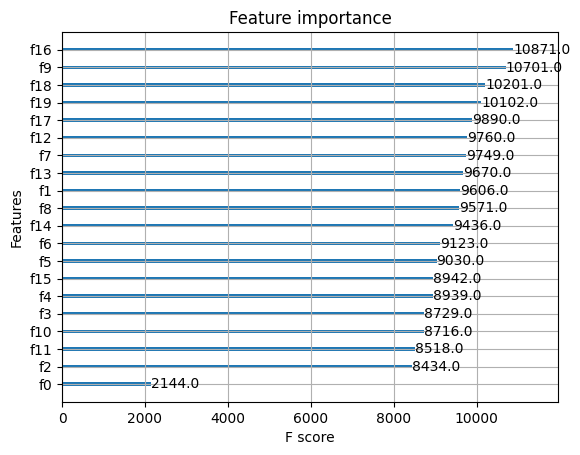

In [51]:
plot_importance(model)
plt.show()

In [41]:
explainer = shap.Explainer(model.predict, X_test_pca)
shap_values = explainer(X_test_pca)
# explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value)

Permutation explainer: 2889it [1:20:53,  1.68s/it]


In [65]:
print("Shap Values: ", shap_values[0])
print("Explanation: ", explanation[0])

Shap Values:  [ 5.9459843e-03 -1.8580241e-02 -1.3720836e-02 -2.5764316e-02
  1.2138074e-01 -9.3698420e-02  4.5879353e-02 -4.4286769e-02
 -2.3120920e-01 -2.1637392e-01  1.9023406e-03 -1.3409981e-02
  3.0908206e-01  1.1032306e-04 -2.5321374e-02  1.3497346e-03
  1.1968113e-01 -5.2978031e-02 -1.9753596e-02 -1.8984107e-02]
Explanation:  .values =
array([ 5.9459843e-03, -1.8580241e-02, -1.3720836e-02, -2.5764316e-02,
        1.2138074e-01, -9.3698420e-02,  4.5879353e-02, -4.4286769e-02,
       -2.3120920e-01, -2.1637392e-01,  1.9023406e-03, -1.3409981e-02,
        3.0908206e-01,  1.1032306e-04, -2.5321374e-02,  1.3497346e-03,
        1.1968113e-01, -5.2978031e-02, -1.9753596e-02, -1.8984107e-02],
      dtype=float32)

.base_values =
-2.112188


In [42]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean Xsolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.Xs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
print_feature_importances_shap_values(shap_values, )

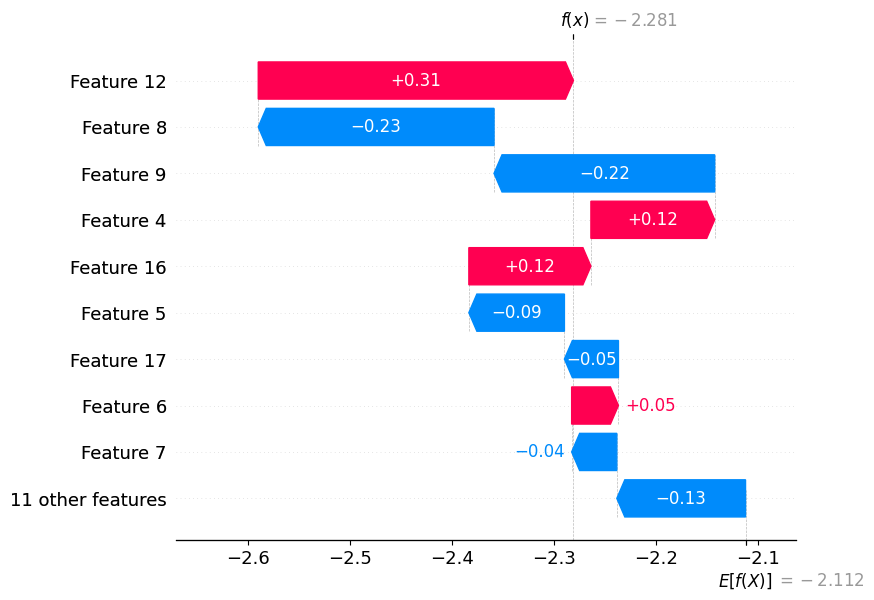

In [63]:
shap.plots.waterfall(explanation[0])

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


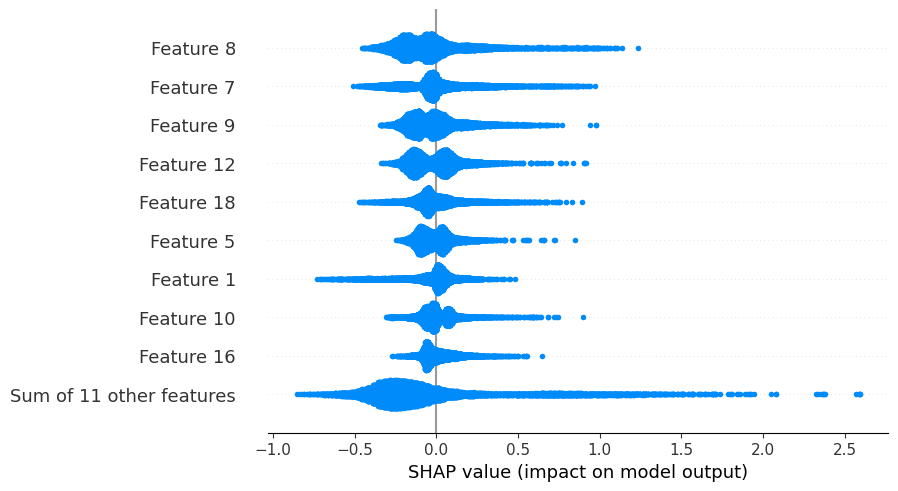

In [40]:
shap.plots.beeswarm(explanation)

In [28]:
componentes_pca = pca.components_

In [73]:
componentes_pca.shape

(20, 44)

In [29]:
shap_values_pca = np.dot(shap_values, componentes_pca)

In [30]:
mean_shap_values_pca = np.mean(shap_values_pca, axis=0)

In [31]:
component_names = X_train.columns

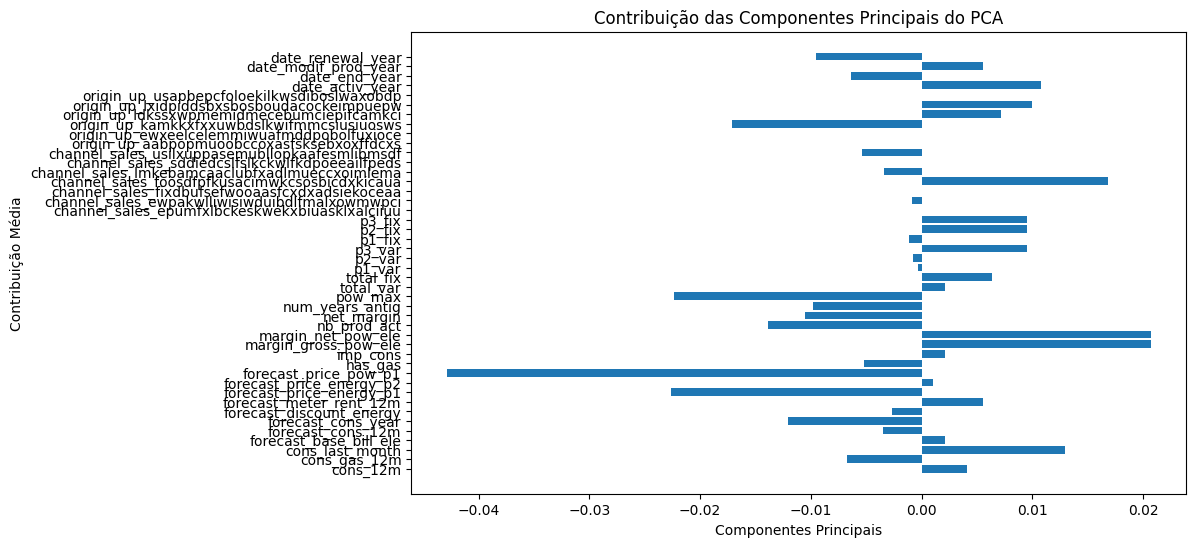

In [38]:
# Plotar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
plt.barh(range(len(component_names)), mean_shap_values_pca, tick_lXel=component_names)
plt.xlXel("Componentes Principais")
plt.ylXel("Contribuição Média")
plt.title("Contribuição das Componentes Principais do PCA")

plt.show()

# Pipeline Final

In [46]:
c = pd.read_csv('base_dados/base_clientes.csv')
hc = pd.read_csv('base_dados/base_hist_churn.csv')
p = pd.read_csv('base_dados/base_precos.csv')
pd.set_option('display.max_columns', None)

In [47]:
# merge of all 3 datasets
pc = c.merge(p, how='inner', on='id')
pc_hc = pc.merge(hc, how='inner', on='id')

In [34]:
p.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
3,3acc714fbd9b3ccaac3c412cf220e929,01/04/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
4,3acc714fbd9b3ccaac3c412cf220e929,01/05/2021,0.168185,0.084213,0.0,44.266930,0.0,0.0


In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()  # Make a copy of the original data
        X_selected = X[self.columns].copy()  # Select only the columns you want

        # Calculating the sum of values for each period (var and fix)
        X_selected['total_var'] = X_selected[['price_p1_var', 'price_p2_var', 'price_p3_var']].sum(axis=1)
        X_selected['total_fix'] = X_selected[['price_p1_fix', 'price_p2_fix', 'price_p3_fix']].sum(axis=1)

        # Creating boolean indicators for energy consumption in each period (var and fix)
        for period in ['p1', 'p2', 'p3']:
            X_selected[f'{period}_var'] = (X_selected[f'price_{period}_var'] > 0).astype(int)
            X_selected[f'{period}_fix'] = (X_selected[f'price_{period}_fix'] > 0).astype(int)

        # Grouping by 'id' and taking the median of the new features
        reshaped_data = X_selected.groupby('id').agg({
            'total_var': 'median',
            'total_fix': 'median',
            'p1_var': 'median',
            'p2_var': 'median',
            'p3_var': 'median',
            'p1_fix': 'median',
            'p2_fix': 'median',
            'p3_fix': 'median'
        }).reset_index()

        columns_to_drop = self.columns.copy()
        columns_to_drop.remove('id')  # Remove 'id' from the list of columns to drop
        
        # Merge the transformed and non-transformed columns
        X_copy = pd.merge(X_copy.drop(columns=columns_to_drop), reshaped_data, left_on='id', right_on='id')

        return X_copy

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin

class Inputation(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, data, target=None):
        return self

    def transform(self, data):
        data_copy = data.copy()  # Select only the columns you want
        data_selected = data[self.columns].copy()

        regression_data = data_selected[['forecast_base_bill_ele', 'imp_cons']].dropna()

        X = regression_data[['imp_cons']]
        y = regression_data['forecast_base_bill_ele']

        model = LinearRegression()
        model.fit(X, y)

        slope = model.coef_[0]
        intercept = model.intercept_

        data_selected['forecast_base_bill_ele'].fillna(data_selected['imp_cons'] * slope + intercept, inplace=True)
        data_selected['forecast_base_bill_year'].fillna(data_selected['imp_cons'] * slope + intercept, inplace=True)

        columns_to_drop = self.columns.copy()
        columns_to_drop.remove('id')  # Remove 'id' from the list of columns to drop
        
        # Merge the transformed and non-transformed columns
        data_copy = pd.merge(data_copy.drop(columns=columns_to_drop), data_selected, left_on='id', right_on='id')

        print(data_copy)
        
        # Retornar o DataFrame com as novas características
        return data_copy

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

class Cleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
                     
        X = X.drop(['campaign_disc_ele','date_first_activ'], axis=1)

        X['has_gas'] = X['has_gas'].map({'t': True, 'f': False})
        X['has_gas'] = X['has_gas'].astype(int)

        X_cleaned = klib.data_cleaning(X)

        # Changing the nan values to unknown
        X_cleaned['channel_sales'] = X_cleaned['channel_sales'].replace(np.nan, 'unknown')
        X_encoded = pd.get_dummies(X_cleaned, columns=['channel_sales'])

        # Changing the nan values to unknown
        X_encoded['origin_up'] = X_encoded['origin_up'].replace(np.nan, 'unknown')
        X_encoded = pd.get_dummies(X_encoded, columns=['origin_up'])

        # droping columns with missing values
        X = X_encoded.drop(['forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'activity_new'], axis=1)
        X = X.dropna()
        
        date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'] # Date columns
        invalid_dates = {"29/02/2018": "28/02/2018", "29/02/2022": "28/02/2022"} # Invalid dates

        # Replace invalid dates with the most likely correct date
        for col in date_cols:
            for inv_date, rep_date in invalid_dates.items():
                X[col] = X[col].replace(inv_date, rep_date)

        for col in date_cols:
            X[col + '_year'] = pd.to_datetime(X[col], dayfirst=True).dt.year

        # Droping the original date columns 
        X = X.drop(columns=date_cols)

        # Removing negative values from the dataset
        columns_to_remove_negatives = [
            'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
            'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_pow_p1',
            'imp_cons', 'net_margin', 'margin_net_pow_ele', 'margin_gross_pow_ele'
        ]

        mask = (X[columns_to_remove_negatives] >= 0).all(axis=1)
        X = X[mask]

        # Retornar o DataFrame com as novas características
        return X

In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, test_size=0.2, random_state=42, y=None):
        self.test_size = test_size
        self.random_state = random_state
        self.y = y

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xy = pd.merge(X, self.y, on='id', how='inner')
        Xy_copy = Xy.copy()  # Make a copy of the original data

        # Separa os recursos (X) e o alvo (y)
        features = Xy_copy.drop(columns=['id', 'churn'])
        y = Xy['churn']

        # Divide os dados em conjuntos de treinamento e teste
        X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=self.test_size, random_state=self.random_state)

        return X_train, X_test, y_train, y_test

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

In [57]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class PCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=20):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        self.pca.fit(X)
        return self

    def transform(self, X):
        return self.pca.transform(X)

    def get_components(self, columns):
        components_df = pd.DataFrame(self.pca.components_, columns=columns)
        return components_df

# Exemplo de uso:
# Suponha que você tenha conjuntos de treinamento e teste 'X_train_scaled' e 'X_test_scaled' que você deseja reduzir com PCA.
# pca_transformer = PCATransformer(n_components=20)
# X_train_pca = pca_transformer.fit_transform(X_train_scaled)
# X_test_pca = pca_transformer.transform(X_test_scaled)

# Para obter os componentes principais, você pode usar o método get_components
# componentes_df = pca_transformer.get_components(X_train.columns)


In [50]:
pc_hc.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,01/01/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,01/02/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,01/03/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,01/04/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,01/05/2021,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0


In [58]:
# Set the parameters
params = {
  'objective': 'binary:logistic',
  'verbosity': 0,
  'booster': 'gbtree',
  'tree_method': 'gpu_hist',
  'learning_rate': 0.005171676107542148,
  'n_estimators': 593,
  'max_depth': 15,
  'subsample': 0.8068033937233334,
  'colsample_bytree': 0.9680836794118163,
}

model = xgb.XGBClassifier(**params)

In [64]:
from sklearn.compose import ColumnTransformer

pipe_engineer = Pipeline([
    ('feature_engineer', FeatureEngineer())
])

pipe_inputation = Pipeline([
    ('inputation', Inputation())
])

pipe_cleaning = Pipeline([
    ('cleaning', Cleaning(how='inner', on='id'))
])

pipe_preprocessor = Pipeline([
    ('data_preprocessor', DataPreprocessor(merge_columns='id', test_size=0.2, random_state=42))
])

pipe_scaler = Pipeline([
    ('scaler', ScalerTransformer())
])

pipe_pca = Pipeline([
    ('pca', PCATransformer())
])



preprocessor = ColumnTransformer(transformers=[
    ('pipe_engineer', pipe_engineer, list_p),
    ('pipe_inputation', pipe_inputation, list_c),
    ('pipe_cleaning', pipe_cleaning, list_p + list_c),
    ('pipe_preprocessor', pipe_preprocessor, list_p + list_c + list_hc),
    ('pipe_scaler', pipe_scaler, list_p + list_c + list_hc),
    ('pipe_pca', pipe_pca, list_p + list_c + list_hc),
])

params = {
  'objective': 'binary:logistic',
  'verbosity': 0,
  'booster': 'gbtree',
  'tree_method': 'gpu_hist',
  'learning_rate': 0.005171676107542148,
  'n_estimators': 593,
  'max_depth': 15,
  'subsample': 0.8068033937233334,
  'colsample_bytree': 0.9680836794118163,
}

modelo = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost', xgb.XGBClassifier(**params))
])

In [122]:
from sklearn.pipeline import Pipeline

# Separating features and target
X = pc_hc.drop('churn', axis=1)
y = pc_hc[['churn', 'id']]

# List of columns to apply feature engineering
cols_price = p.columns.tolist()
cols_clients = c.columns.tolist()

# Defining the pipeline
preprocessing_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineering(cols_price)),
    ('Inputation', Inputation(cols_clients)),
    ('cleaning', Cleaning()),
    ('DataPreprocessor', DataPreprocessor(test_size=0.2, random_state=42, y=y)),
])

X_train, X_test, y_train, y_test = preprocessing_pipeline.fit_transform(X)


# Transforming the data
# X_transformed = preprocessing_pipeline.fit_transform(X)


Shape of cleaned data: (16096, 38) - Remaining NAs: 39773


Dropped rows: 2298432
     of which 2298432 duplicates. (Rows (first 150 shown): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 5679661
Reduced memory by at least: 659.65 MB (-99.62%)



In [132]:
params = {
  'objective': 'binary:logistic',
  'verbosity': 0,
  'booster': 'gbtree',
  'tree_method': 'gpu_hist',
  'learning_rate': 0.005171676107542148,
  'n_estimators': 593,
  'max_depth': 15,
  'subsample': 0.8068033937233334,
  'colsample_bytree': 0.9680836794118163,
}

transformations_pipe = Pipeline([
    ('scaler', ScalerTransformer()),
    ('pca', PCATransformer()),
    ('xgboost', xgb.XGBClassifier(**params))
])

X_train_trans = transformations_pipe.fit_transform(X_train)
X_test_trans = transformations_pipe.transform(X_test)

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [113]:
X_transformed

,id,total_var,total_fix,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
2,d29c2c54acc38ff3c0614d0a653813dd,0.151367,44.266930,1.0,0.0,0.0,1.0,0.0,0.0,4660,0,0,51.533542,189.95,0,0.0,16.270000,0.145711,0.000000,44.311378,0,0.000000,16.379999,16.379999,1,18.889999,6,13.800000,False,False,False,False,False,False,False,False,True,False,False,False,2015,2022,2015,2021
3,764c75f661154dac3a6c254cd082ea7d,0.260349,44.444710,1.0,1.0,0.0,1.0,0.0,0.0,544,0,0,51.533542,47.96,0,0.0,38.720001,0.165794,0.087899,44.311378,0,0.000000,28.600000,28.600000,1,6.600000,6,13.856000,False,False,False,True,False,False,False,False,True,False,False,False,2016,2022,2016,2021
4,bba03439a292a1e166f80264c16191cb,0.153048,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,1584,0,0,51.533542,240.04,0,0.0,19.830000,0.146694,0.000000,44.311378,0,0.000000,30.219999,30.219999,1,25.459999,6,13.200000,False,False,False,False,True,False,False,False,True,False,False,False,2016,2022,2016,2021
6,149d57cf92fc41cf94415803a877cb4b,0.300305,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,4425,0,526,123.454089,445.75,526,0.0,131.729996,0.116900,0.100015,40.606701,0,52.320000,44.910000,44.910000,1,47.980000,6,19.799999,False,False,False,False,False,False,False,False,True,False,False,False,2016,2022,2016,2021
7,1aa498825382410b098937d65c4ec26d,0.260561,44.266930,1.0,1.0,0.0,1.0,0.0,0.0,8302,0,1998,290.100000,796.94,1998,0.0,30.120001,0.164775,0.086131,45.308376,0,181.210007,33.119999,33.119999,1,118.889999,4,13.200000,False,False,False,False,False,False,True,False,False,False,True,False,2017,2022,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0.144350,44.444710,1.0,0.0,0.0,1.0,0.0,0.0,32270,47940,0,51.533542,4648.01,0,0.0,18.570000,0.138305,0.000000,44.311378,1,0.000000,27.879999,27.879999,2,381.769989,4,15.000000,False,False,False,True,False,False,False,False,False,False,True,False,2018,2022,2021,2020
16092,d0a6f71671571ed83b2645d23af6de00,0.277385,103.615761,1.0,1.0,1.0,1.0,1.0,1.0,7223,0,181,68.640000,631.69,181,0.0,144.029999,0.100167,0.091892,58.995953,0,15.940000,0.000000,0.000000,1,90.339996,3,6.000000,False,False,False,True,False,False,False,False,False,False,True,False,2018,2022,2018,2021
16093,10e6828ddd62cbcf687cb74928c4c2d2,0.300305,81.457771,1.0,1.0,1.0,1.0,1.0,1.0,1844,0,179,76.345581,190.39,179,0.0,129.600006,0.116900,0.100015,40.606701,0,18.049999,39.840000,39.840000,1,20.379999,4,15.935000,False,False,False,True,False,False,False,False,False,False,True,False,2018,2022,2018,2021
16094,1cf20fd6206d7678d5bcafd28c53b4db,0.151367,44.266930,1.0,0.0,0.0,1.0,0.0,0.0,131,0,0,51.533542,19.34,0,0.0,7.180000,0.145711,0.000000,44.311378,0,0.000000,13.080000,13.080000,1,0.960000,3,11.000000,False,False,False,True,False,False,False,False,False,False,True,False,2018,2022,2018,2021


In [124]:
X_train.shape

(138529, 43)

In [125]:
X_test.shape

(34633, 43)

# Explicabilidade

In [1]:
import pandas as pd
import numpy as np

In [6]:
import pickle

with open('./base_dados/pca_componentes.pkl', 'rb') as arquivo:
    # Carregue o objeto Python do arquivo
    pca_componentes = pickle.load(arquivo)

with open('./base_dados/shap_values.pkl', 'rb') as arquivo:
    # Carregue o objeto Python do arquivo
    shap_values = pickle.load(arquivo)

In [52]:
type(shap_values)

shap._explanation.Explanation

In [54]:
matrix_shap = shap_values.values

In [55]:
type(pca_componentes)

numpy.ndarray

In [56]:
# Shap values features originais
shap_values_pca = np.dot(matrix_shap, pca_componentes)
# Média dos shap values
mean_shap_values_pca = np.mean(shap_values_pca, axis=0)

In [57]:
import pickle

with open('./base_dados/final_shap_values.pkl', 'wb') as f:
  pickle.dump(shap_values_pca, f)

In [58]:
import pickle

with open('./base_dados/final_shap_values_mean.pkl', 'wb') as f:
  pickle.dump(mean_shap_values_pca, f)

Text(0.5, 1.0, 'Contribuição das Componentes Principais do PCA')

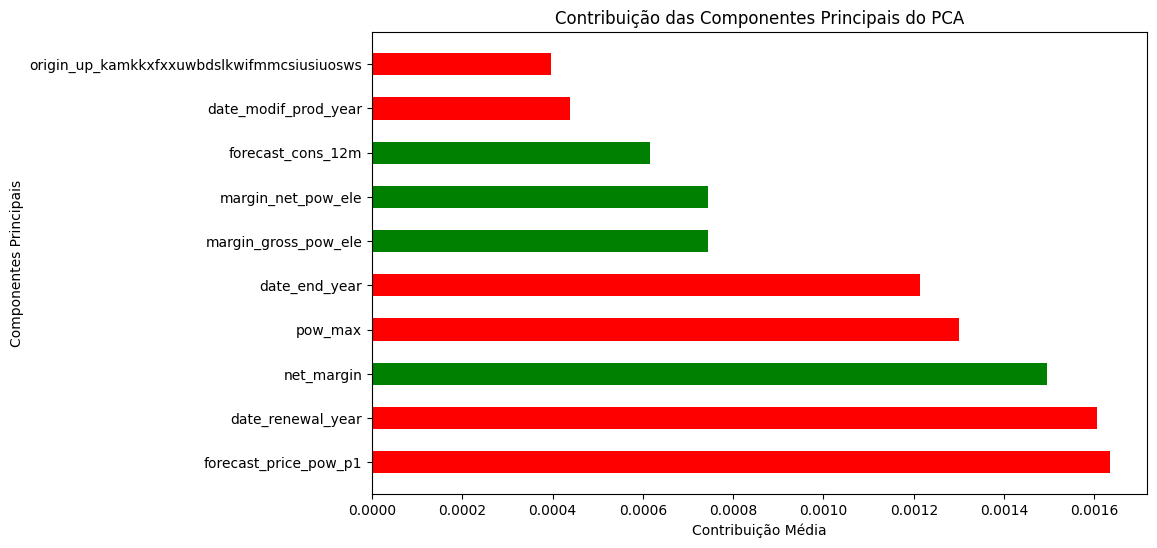

In [72]:
# Colocando final_shap_values_mean em um DataFrame
mean_shap_values_pca_df = pd.DataFrame(mean_shap_values_pca, index=X_train.columns, columns=['mean_shap_values_pca'])
# Lista de features com inpacto negativo
negative_impact = mean_shap_values_pca_df[mean_shap_values_pca_df['mean_shap_values_pca'] < 0].index.tolist()

mean_shap_values_pca_df['mean_shap_values_pca'] = mean_shap_values_pca_df['mean_shap_values_pca'].abs()
mean_shap_values_pca_df.sort_values(by='mean_shap_values_pca', ascending=False, inplace=True)

# Fazer um recorte para selecionar somente as 10 features mais importantes	
mean_shap_values_pca_df = mean_shap_values_pca_df.iloc[:10]

# Plotar um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
plt.barh(mean_shap_values_pca_df.index, np.abs(mean_shap_values_pca_df['mean_shap_values_pca']), color=['r' if x in negative_impact else 'g' for x in mean_shap_values_pca_df.index], height=0.5)
plt.xlabel("Contribuição Média")
plt.ylabel("Componentes Principais")
plt.title("Contribuição das Componentes Principais do PCA")

In [51]:
mean_shap_values_pca

array([.values =
       1.0675461829223017e-05

       .base_values =
       -0.0016870764927989093

       .data =
       -0.28097924893736526  , .values =
                               -2.194485251538318e-05

                               .base_values =
                               0.010000779958368653

                               .data =
                               2172.79146467982      ,
       .values =
       0.0002296049141107579

       .base_values =
       -0.012232767744314452

       .data =
       -0.3367338897846835  , .values =
                              -2.37274657901072e-05

                              .base_values =
                              -0.0003591868092019701

                              .data =
                              0.01074503361801573   ,
       .values =
       0.0006150877677346967

       .base_values =
       0.00017330066653831273

       .data =
       -0.013358786448618643 , .values =
                               -0.0002479

IndexError: tuple index out of range

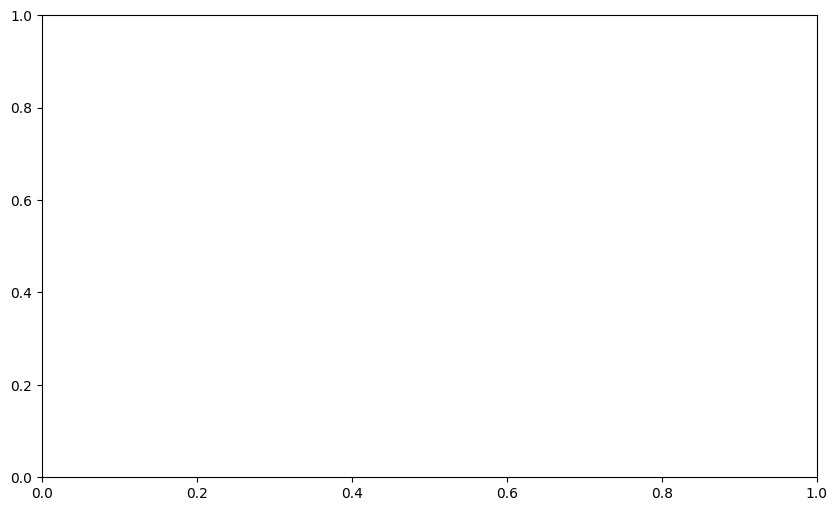

In [50]:
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), mean_shap_values_pca)
plt.xlXel("Componentes Principais")
plt.ylXel("Contribuição Média")
plt.title("Contribuição das Componentes Principais do PCA")

plt.show()